<a href="https://colab.research.google.com/github/Sebas-gifPaz777/AI_2_nn_model/blob/main/Model_tunning_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from tensorflow.keras.datasets import mnist
from scipy import ndimage
import numpy as np
import os
keras.__version__

'3.4.1'

# Model Tunning

##Loading respective data

In [3]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Filtrar solo imágenes de 0 y 1
  train_filter = np.where((y_train == 0) | (y_train == 1))
  test_filter = np.where((y_test == 0) | (y_test == 1))

  x_train, y_train = x_train[train_filter], y_train[train_filter]
  x_test, y_test = x_test[test_filter], y_test[test_filter]

  return  x_train, y_train, x_test, y_test

In [4]:
# Values are assigned to each set
train_x_origin, train_y_origin, test_x_origin, test_y_origin = load_dataset()

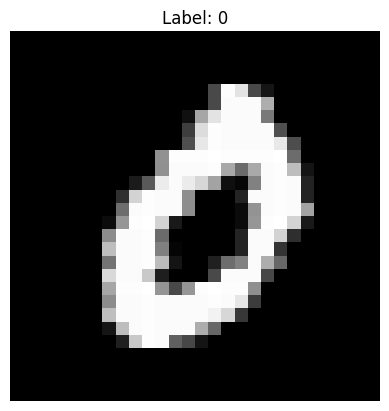

In [5]:
plt.imshow(train_x_origin[9], cmap='gray')
plt.title(f'Label: {train_y_origin[9]}')
plt.axis('off')
plt.show()

In [6]:
## Shape of each set
print(f'Train dataset shape: {train_x_origin.shape}')
print(f'Train labels dataset shape: {train_y_origin.shape}')
print(f'Test dataset shape: {test_x_origin.shape}')
print(f'Test labeals dataset shape: {test_y_origin.shape}')

Train dataset shape: (12665, 28, 28)
Train labels dataset shape: (12665,)
Test dataset shape: (2115, 28, 28)
Test labeals dataset shape: (2115,)


In [7]:
# Modfying all sets (shapes and data type)
train_y_origin = np.asarray(train_y_origin).astype('float32')
test_y_origin = np.asarray(test_y_origin).astype('float32')

train_x_origin = train_x_origin.reshape(train_x_origin.shape[0], -1)
test_x_origin = test_x_origin.reshape(test_x_origin.shape[0], -1)
print(f'Train dataset new shape: {train_x_origin.shape}')
print(f'Train inputs: {train_x_origin.shape[1]}')


Train dataset new shape: (12665, 784)
Train inputs: 784


##Model Creation

In [8]:
from keras import models
from keras.layers import Dense
from keras import layers

original_model = models.Sequential()
original_model.add(Dense(16, activation='relu', input_shape=(train_x_origin.shape[1],)))
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
original_hist = original_model.fit(train_x_origin, train_y_origin,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_x_origin, test_y_origin))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9000 - loss: 2.4037 - val_acc: 0.9967 - val_loss: 0.0309
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9935 - loss: 0.0686 - val_acc: 0.9976 - val_loss: 0.0102
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9965 - loss: 0.0219 - val_acc: 0.9957 - val_loss: 0.0280
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9988 - loss: 0.0078 - val_acc: 0.9986 - val_loss: 0.0155
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9994 - loss: 0.0027 - val_acc: 0.9986 - val_loss: 0.0043
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9982 - loss: 0.0177 - val_acc: 0.9967 - val_loss: 0.0239
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9995 - loss: 0.0037 - val_acc: 0.9995 - val_loss: 5.9446e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9998 - loss: 3.0221e-04 - val_acc: 0.9943 - val_loss: 0.0640
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9989

##Applying regularizers (l2)

In [10]:
from keras import regularizers

value = train_x_origin[1]
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.001)))
l2_model.add(layers.Dense(16,
                          activation='relu',kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [12]:
l2_model_hist = l2_model.fit(train_x_origin, train_y_origin,
                             epochs=20,
                             batch_size=512,
                             validation_data=(test_x_origin, test_y_origin))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.8728 - loss: 3.6572 - val_acc: 0.9924 - val_loss: 0.1517
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9964 - loss: 0.0857 - val_acc: 0.9948 - val_loss: 0.1257
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9983 - loss: 0.0531 - val_acc: 0.9976 - val_loss: 0.0761
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9996 - loss: 0.0418 - val_acc: 0.9967 - val_loss: 0.0841
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9987 - loss: 0.0458 - val_acc: 0.9972 - val_loss: 0.0975
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9993 - loss: 0.0399 - val_acc: 0.9972 - val_loss: 0.0658
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9997 - loss: 0.0358 - val_acc: 0.9995 - val_loss: 0.0548
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9990 - loss: 0.0418 - val_acc: 0.9981 - val_loss: 0.0539
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9997 - loss

## Adding dropout

In [13]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(train_x_origin.shape[1],)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [14]:
dpt_model_hist = dpt_model.fit(train_x_origin, train_y_origin,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_x_origin, test_y_origin))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7812 - loss: 11.8245 - val_acc: 0.9972 - val_loss: 0.0310
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8617 - loss: 0.4743 - val_acc: 0.9967 - val_loss: 0.0286
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8662 - loss: 0.3202 - val_acc: 0.9976 - val_loss: 0.0265
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8946 - loss: 0.2561 - val_acc: 0.9976 - val_loss: 0.0225
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9013 - loss: 0.2211 - val_acc: 0.9981 - val_loss: 0.0126
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9174 - loss: 0.2348 - val_acc: 0.9981 - val_loss: 0.0127
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9298 - loss: 0.1859 - val_acc: 0.9986 - val_loss: 0.0124
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9291 - loss: 0.1650 - val_acc: 0.9972 - val_loss: 0.0100
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9274 - loss

Results plotted and validation loss compared between models

In [15]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
l2_model_val = l2_model_hist.history['val_loss']
dpt_model_val = dpt_model_hist.history['val_loss']


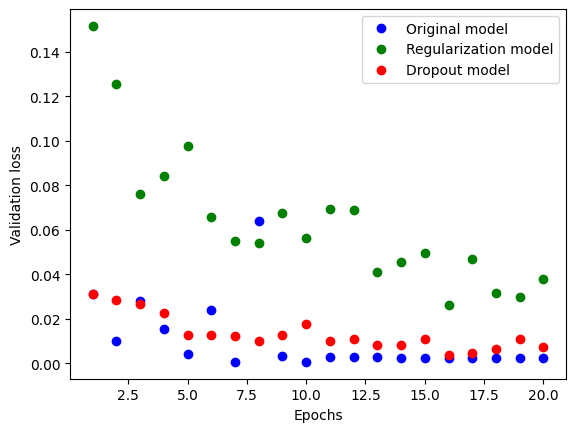

In [16]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'bo', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, l2_model_val, 'go', label='Regularization model')
plt.plot(epochs, dpt_model_val, 'ro', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Using GridSearch to determinate the best hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

In [18]:
# Creation of classifier class to use the GridSearch
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='rmsprop', epochs=20, batch_size=512):
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model =models.Sequential()
        model.add(Dense(16, input_shape=(train_x_origin.shape[1],), activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        loss, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

In [19]:
model = KerasClassifierCustom()

# Definir los hiperparámetros a buscar
param_grid = {
    'batch_size': [16,32,128,512],
    'epochs': [10,20,30],
    'optimizer': ['adam', 'rmsprop']
}

# Ejecutar Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_x_origin, train_y_origin)

# Mostrar los mejores hiperparámetros encontrados
print(f"Best result: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first l

Best result: 0.9990525643030802 using {'batch_size': 32, 'epochs': 20, 'optimizer': 'rmsprop'}
